In [ ]:
!pip install notebook --upgrade

## 미분

최적화를 하기 위해서는 입력값이 변했을 때 함수의 출력값이 어떻게 달라지는지를 정량적으로 알아야 하며 이러한 과정이 미분이다.

함수의 그래프상에 있는 한 점을 줌심으로 그래프를 무한히 확대해 보면 그래프의 모양이 직선에 가까워지는데 이때의 기울기를 미분이라고 한다. 이 직선은 같은 점을 기준으로 그린 그래프의 접선과 같다.

신경망에서 미분의 필요성 : https://gggggeun.tistory.com/120           https://gggggeun.tistory.com/121

미분 개념 : https://www.youtube.com/watch?v=kMZ3RJEaLE4

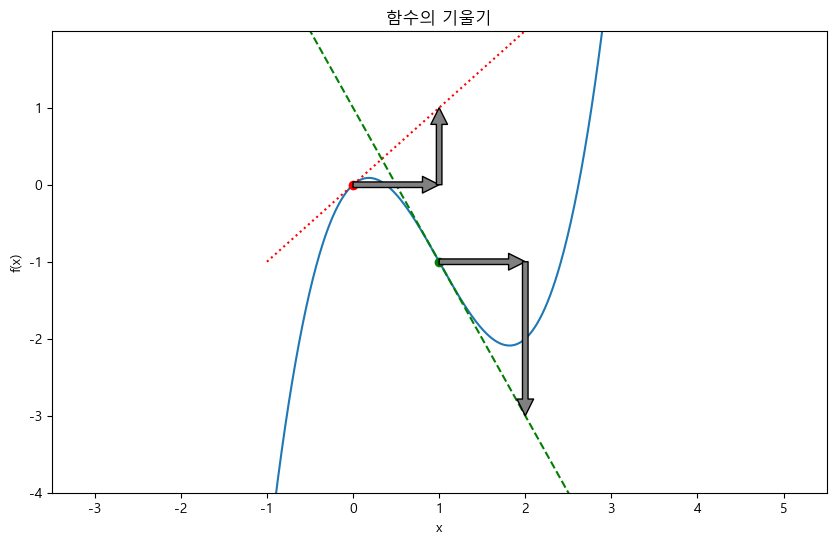

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 단위 처리

def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 400)
y = f(x)
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("함수의 기울기")
plt.show()

C:\Users\h\AppData\Local\Temp\ipykernel_3356\2469641370.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'b-', lw=1, c='k')
C:\Users\h\AppData\Local\Temp\ipykernel_3356\2469641370.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'b-', lw=1, c='k')
C:\Users\h\AppData\Local\Temp\ipykernel_3356\2469641370.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'b-', lw=1, c='k')


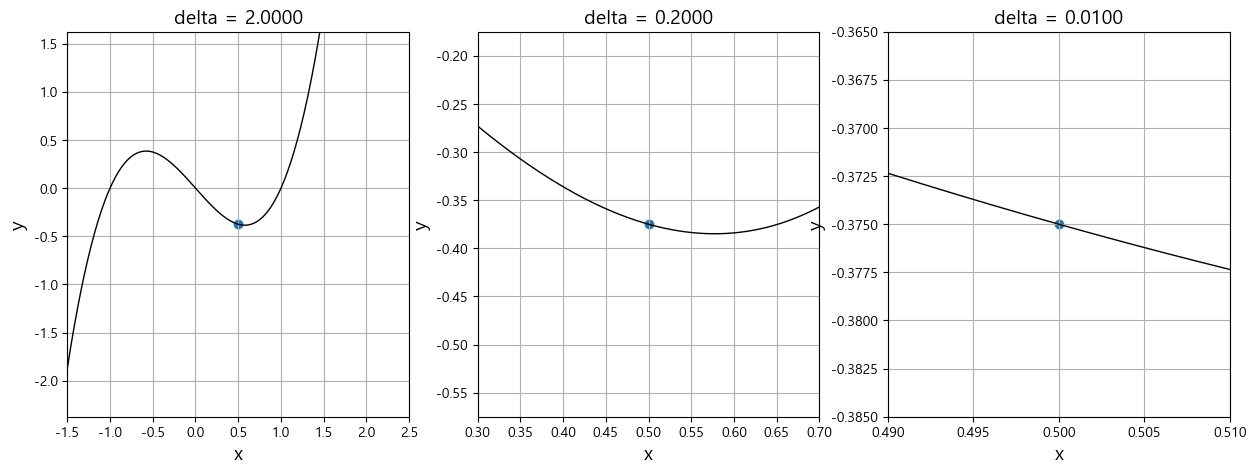

In [7]:
def f(x):
    return(x**3 - x)

plt.figure(figsize=(15, 5))
delta = [2.0, 0.2, 0.01]

x = np.linspace(0.5-delta[0], 0.5+delta[0], 200)
y = f(x)

plt.subplot(131)

plt.ylim(-3.0/8.0-delta[0], -3.0/8.0+delta[0])
plt.xlim(0.5-delta[0], 0.5+delta[0])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[0], fontsize=14)


x = np.linspace(0.5-delta[1], 0.5+delta[1], 200)
y = f(x)

plt.subplot(132)

plt.ylim(-3.0/8.0-delta[1], -3.0/8.0+delta[1])
plt.xlim(0.5-delta[1], 0.5+delta[1])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[1], fontsize=14)

x = np.linspace(0.5-delta[2], 0.5+delta[2], 200)
y = f(x)

plt.subplot(133)

plt.ylim(-3.0/8.0-delta[2], -3.0/8.0+delta[2])
plt.xlim(0.5-delta[2], 0.5+delta[2])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[2], fontsize=14)

plt.show()

### 접선의 방정식

- 함수 f(x)에서 x의 값을 dx만큼 변화시켰을 때 f(x)의 변화량 (f(x+dx)-f(x))는 f'(x)dx와 같다.
- 미분 : y=f(x)라는 그래프상의 점(a,f(a))가 있을 때 그 점에서 그은 접선의 기울기는 f'(a)이며 a에서의 [순간 변화율]을 의미 (=미분의 핵심!)
- 적분 : 도함수 f'(x)의 하방 면적은 원 함수 f(x)의 y의 값이다. ex) f(x) = $x^2$

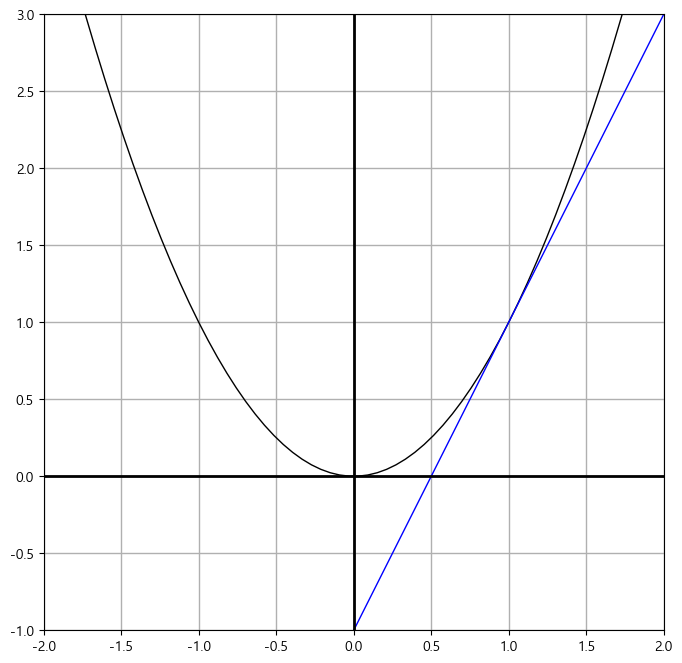

In [11]:
import warnings
warnings.filterwarnings('ignore')

def f(x):
    return(x**2)
def g(x):
    return(2*x - 1)
x = np.linspace(-3,3,100)
fig = plt.figure(figsize = (8,8))
plt.plot(x,f(x),'b-',lw=1,c='k') #x에 대해서 f(x)함수를 정해줌
plt.plot(x,g(x),'b-',lw=1,c='b') #기울기
plt.plot([x.min(),x.max()],[0,0],lw=2, c='k')
plt.plot([0,0],[g(x).min(), f(x).max()],lw=2, c='k')
plt.ylim(-1,3)
plt.xlim(-2,2)
plt.grid(lw=1)
plt.show()

In [14]:
from scipy.misc import derivative

print(derivative(f,1,dx=1e-6))
print(derivative(f,2,dx=1e-6))

2.000000000002
4.000000000115023


#### 편미분
- 다변수 함수에서 한 변수를 제외한 변수들의 값을 고정하고(상수처리 =없앤다), 해당 변수의 변화에 따른 함수값의 변화량을 나타내는 개념.

In [20]:
#주피터 노트분에서 수학식의 라텍스(LaTeX) 표현을 위해 필요함
import sympy
sympy.init_printing(use_latex='mathjax')

x = sympy.symbols('x')
x

x

In [18]:
f = x **2 + 4 * x
f

 2      
x  + 4⋅x

In [19]:
x,y = sympy.symbols('x y')
f = x ** 2 + 4 * x * y + 4 * y **2
f

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [21]:
#diff() 함수로 미분, 변수, 상수를 구분하기 위하여 편미분인 것처럼 입력 변수 지정
sympy.diff(f,x)

2⋅x + 4⋅y

In [23]:
sympy.diff(f,y) #편미분

4⋅x + 8⋅y